# Homework 3

## 1. Assume you have two sorted linked lists. Use recursion to merge these lists and return a new sorted list.

In [9]:
class Node:
    """
    Implementation of a node
    """
    def __init__(self, val=None):
        self.val = val
        self.next_node = None
    
    def set_next_node(self, next_node):
        self.next_node = next_node
        
class Singly_linked_list:
    """
    Implementation of a singly linked list
    """
    def __init__(self, head_node=None):
        self.head_node = head_node

    def list_traversed(self):
        node = self.head_node
        while node:
            print(node.val, end=' -> ')
            node = node.next_node

#Complexity O(n)
def merge (list_1, list_2):
    if(list_1 is None):
        return list_2
    elif(list_2 is None):
        return list_1
        
    if(list_1.val > list_2.val):
        list_2.next_node = merge(list_1, list_2.next_node)
        return list_2
    
    elif(list_2.val > list_1.val):
        list_1.next_node = merge(list_1.next_node, list_2)
        return list_1

                   
m1 = Node(1)
m2 = Node(3)
m3 = Node(5)
m4 = Node(7)
m5 = Node(2)
m6 = Node(4)
m7 = Node(6)

m1.set_next_node(m2)
m2.set_next_node(m3)
m3.set_next_node(m4)

m5.set_next_node(m6)
m6.set_next_node(m7)

list1 = Singly_linked_list(m1)
print("List 1:")
list1.list_traversed()

list2 = Singly_linked_list(m5)
print("\n\nList 2:")
list2.list_traversed()

list_merged = Singly_linked_list(merge(list1.head_node, list2.head_node))
print("\n\nList Merged:")
list_merged.list_traversed()

List 1:
1 -> 3 -> 5 -> 7 -> 

List 2:
2 -> 4 -> 6 -> 

List Merged:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 

## 2. Implement quick sort

### 1. Use the divide and conquer technique to implement the quick sort algorithm studied in class.

In [15]:
arr=[5,9,7,2,3,10,0,4,1,8,6,11]

def quicksort(arr):
    s1=[]
    s2=[]
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    
    for element in arr[1:]:
        if element <= pivot:
            s1.append(element)
        else:
            s2.append(element)
    return quicksort(s1)+[pivot]+quicksort(s2)

print("Array QuickSorted:")
print(quicksort(arr))

Array QuickSorted:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


### 2. Use a couple of parragraphs to explain the steps of divide and conquer:

### 3. Analyze complexity 

## 3. Compare quick sort and merge sort

In [6]:
import random
#Importacion de librerias de Python
from time import time
from time import sleep
import ctypes
from functools import wraps
import time
import pandas as pd
import matplotlib.pyplot as plt

time_quick_sort=[]
time_merge_sort=[]

#Funcion para medir el tiempo de ejecucion y guardar en el arreglo time_array el tiempo que toma cada ejecucion de 
#la funcion transform()
def timer(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        return total_time
    return timeit_wrapper

    
def quick_sort(arr):
    s1=[]
    s2=[]
    if len(arr) <= 1:
        return arr
    pivot = arr[0]
    
    for element in arr[1:]:
        if element <= pivot:
            s1.append(element)
        else:
            s2.append(element)
    return quick_sort(s1)+[pivot]+quick_sort(s2)

def merge_sort(nums):
    if len(nums) <= 1:
        return nums
    pivot = int(len(nums) / 2)
    left = merge_sort(nums[0:pivot])
    right = merge_sort(nums[pivot:])
    return merge(left, right)

def merge(left, right):
    left_pointer = 0
    right_pointer = 0
    sorted_list = []
    while left_pointer < len(left) and right_pointer < len(right):
        if left[left_pointer] < right[right_pointer]:
            sorted_list.append(left[left_pointer])
            left_pointer += 1
        else:
            sorted_list.append(right[right_pointer])
            right_pointer += 1
    
    sorted_list.extend(left[left_pointer:])
    sorted_list.extend(right[right_pointer:])
    
    return sorted_list

array_numbers = []

for x in range(1,10001):
    array_numbers.append(x)

@timer
def test_quick_sort(array):
    quick_sort(array)

@timer
def test_merge_sort(array):
    merge_sort(array)

for x in range(1,1001):
    random.shuffle(array_numbers)
    time_quick_sort.append(test_quick_sort(array_numbers))
    time_merge_sort.append(test_merge_sort(array_numbers))


In [14]:
df = pd.DataFrame(zip(range(1,1001),time_quick_sort,time_merge_sort))
df.columns = ['n','Quick sort','Merge sort']
df

,n,Quick sort,Merge sort
0,1,0.025016,0.035774
1,2,0.016254,0.035859
2,3,0.017279,0.037526
3,4,0.016264,0.032170
4,5,0.017738,0.031857
...,...,...,...
995,996,0.021191,0.055530
996,997,0.022584,0.055566
997,998,0.022834,0.055230
998,999,0.026595,0.045752


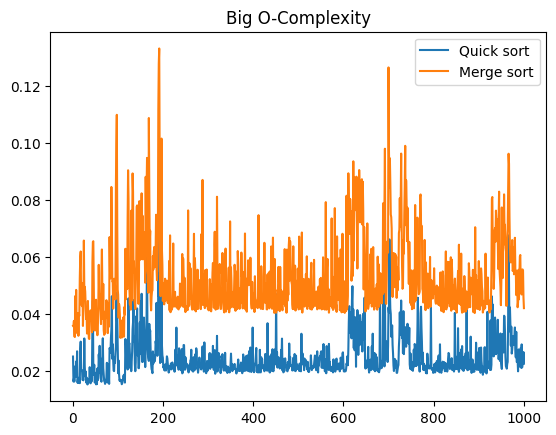

In [10]:
plt.plot(x_numbers, time_quick_sort, label='Quick sort')
plt.plot(x_numbers, time_merge_sort, label='Merge sort')
plt.legend()
plt.title("Big O-Complexity")
plt.show()

## 4. Implement factorials with recursion

In [1]:
import random
#Importacion de librerias de Python
from time import time
from time import sleep
import ctypes
from functools import wraps
import time
import pandas as pd
import matplotlib.pyplot as plt

time_factorial=[]

def timer(func):
    @wraps(func)
    def timeit_wrapper(*args, **kwargs):
        start_time = time.perf_counter()
        result = func(*args, **kwargs)
        end_time = time.perf_counter()
        total_time = end_time - start_time
        return total_time
    return timeit_wrapper

@timer
def factorial(num):
    if num == 1:
        return 1
    else:
        return num * factorial (num - 1)

for num in range(1,601):
    time_factorial.append(factorial(num))


In [2]:
df = pd.DataFrame(zip(range(1,1001),time_factorial))
df.columns = ['n','time_factorial']
df

,n,time_factorial
0,1,8.000061e-07
1,2,1.600012e-06
2,3,1.500011e-06
3,4,1.800014e-06
4,5,2.400018e-06
...,...,...
595,596,3.398000e-04
596,597,3.361000e-04
597,598,3.409000e-04
598,599,3.345000e-04


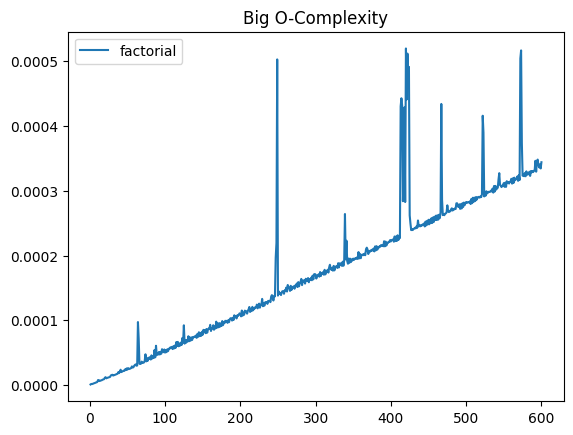

In [4]:
plt.plot(range(1,601), time_factorial, label='factorial')
plt.legend()
plt.title("Big O-Complexity")
plt.show()